# Problem 1

You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("Election.csv")

In [3]:
data.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [4]:
data.shape

(1525, 10)

In [5]:
data = data.drop(columns = ['Unnamed: 0'],axis = 1)

In [6]:
data.shape

(1525, 9)

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [9]:
data.duplicated().sum()

8

In [10]:
data.drop_duplicates(keep = False,inplace = True)

In [11]:
data.duplicated().sum()

0

In [12]:
data.shape

(1509, 9)

In [13]:
data.isnull().sum().sum()

0

In [14]:
categorical_features=[]
numerical_features=[]
for i in data.columns:
    if data[i].dtype=="object":
        categorical_features.append(i)
    else:
        numerical_features.append(i)
print(categorical_features) 
print(numerical_features)

['vote', 'gender']
['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']


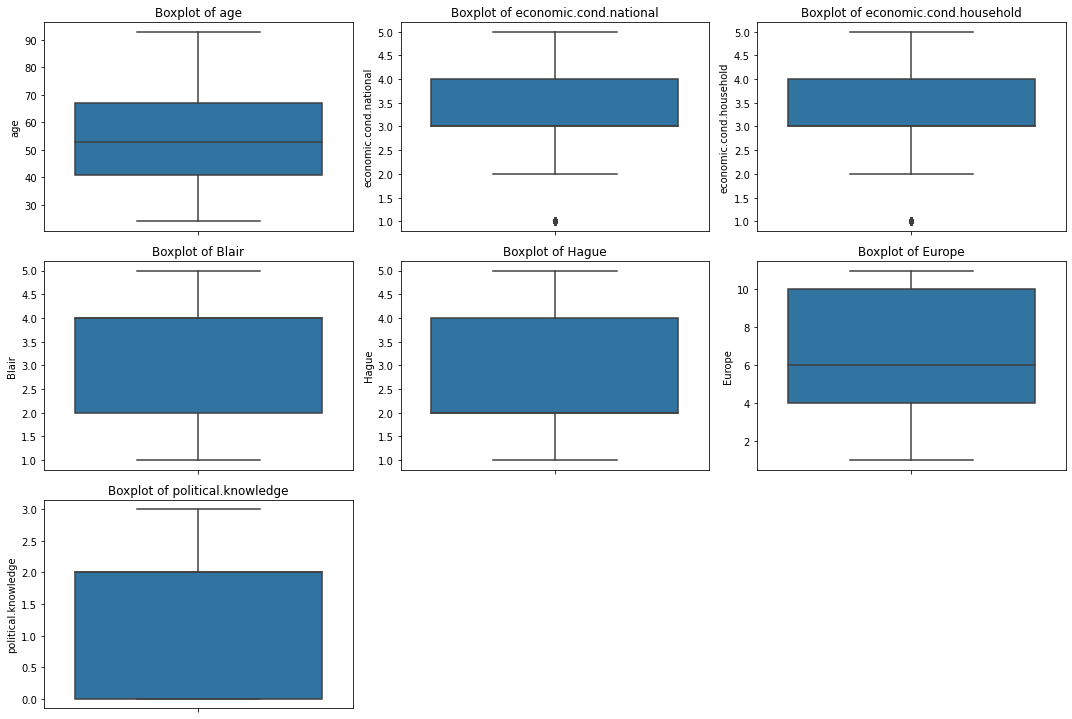

In [15]:
plt.figure(figsize = (15,20))
box = numerical_features
for i in range (len(box)):
    plt.subplot(6,3,i+1)
    sns.boxplot(y = data[box[i]],data = data)
    plt.title('Boxplot of {}'.format(box[i]))
    plt.tight_layout()

In [16]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range   

In [17]:
for column in numerical_features:
    lr,ur=remove_outlier(data[column])
    data[column]=np.where(data[column]>ur,ur,data[column])
    data[column]=np.where(data[column]<lr,lr,data[column])

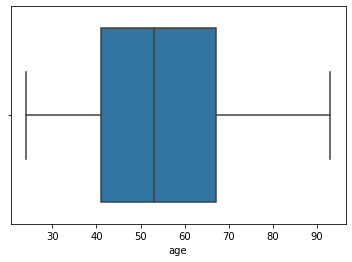

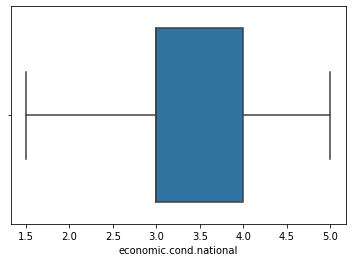

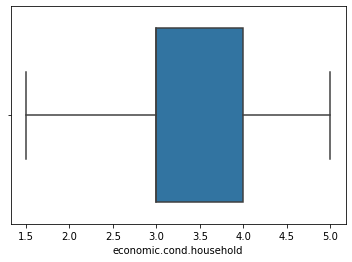

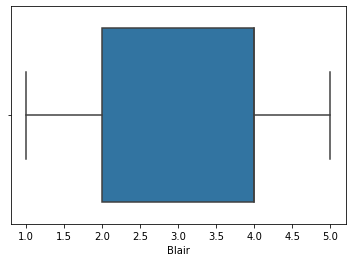

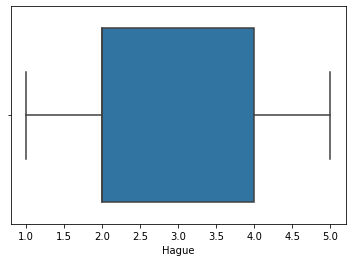

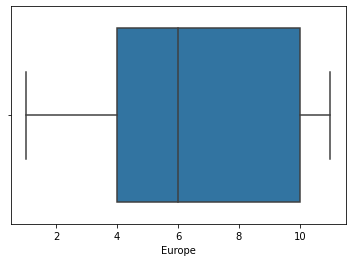

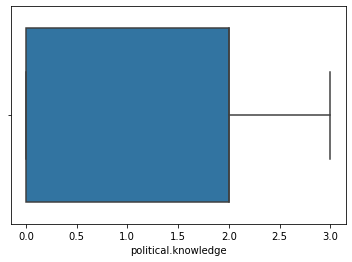

In [18]:
for i in numerical_features:
    sns.boxplot(data[i],whis = 1.5)
    plt.show()

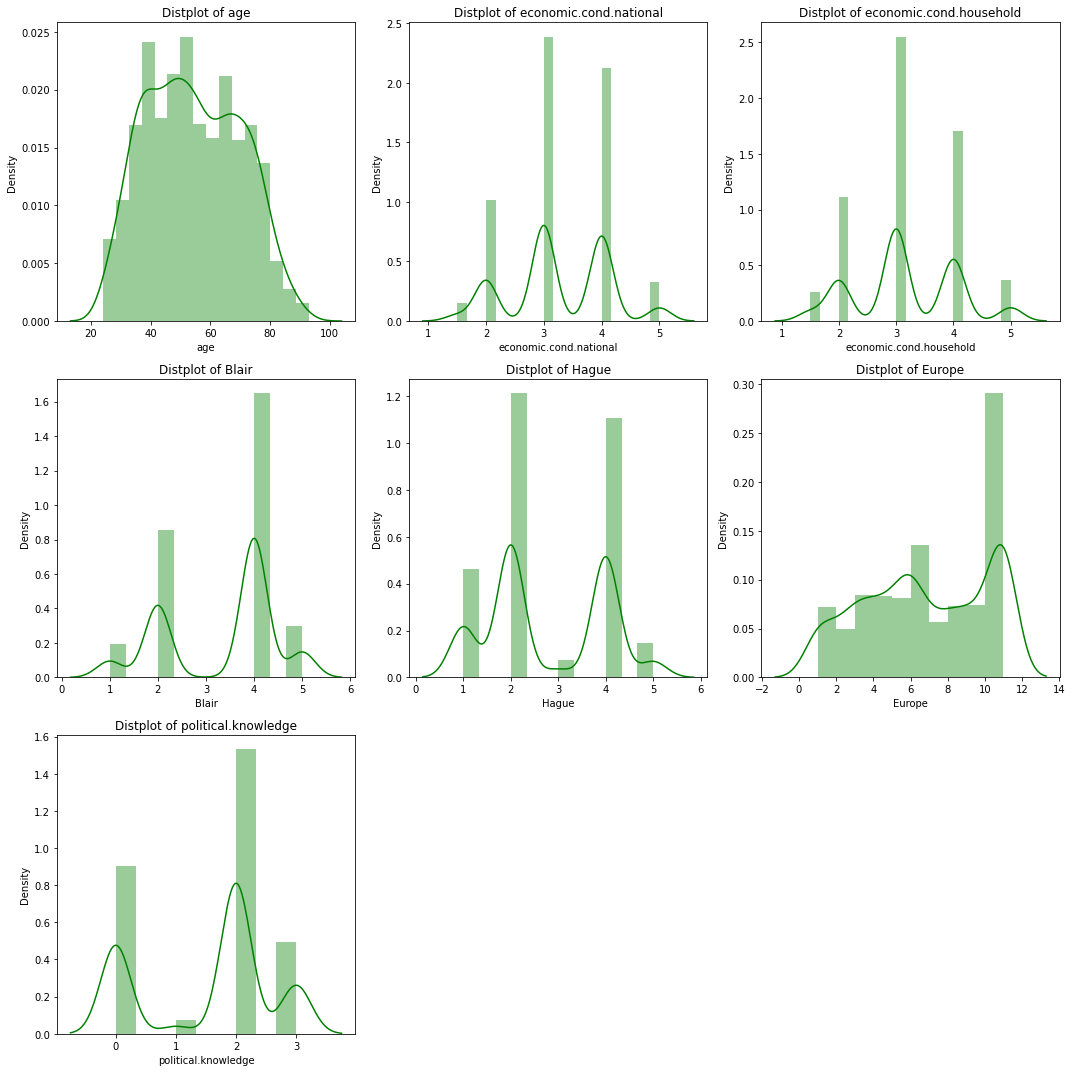

In [19]:
#data.hist(figsize=(20,20))
plt.figure(figsize=(15,15))
dist = numerical_features
for i in range(len(dist)):
    plt.subplot(3,3,i+1)
    sns.distplot(data[dist[i]],kde = True,color = 'g')
    plt.title('Distplot of {}'.format(dist[i]))
    plt.tight_layout()
  

In [20]:
categorical_features

['vote', 'gender']

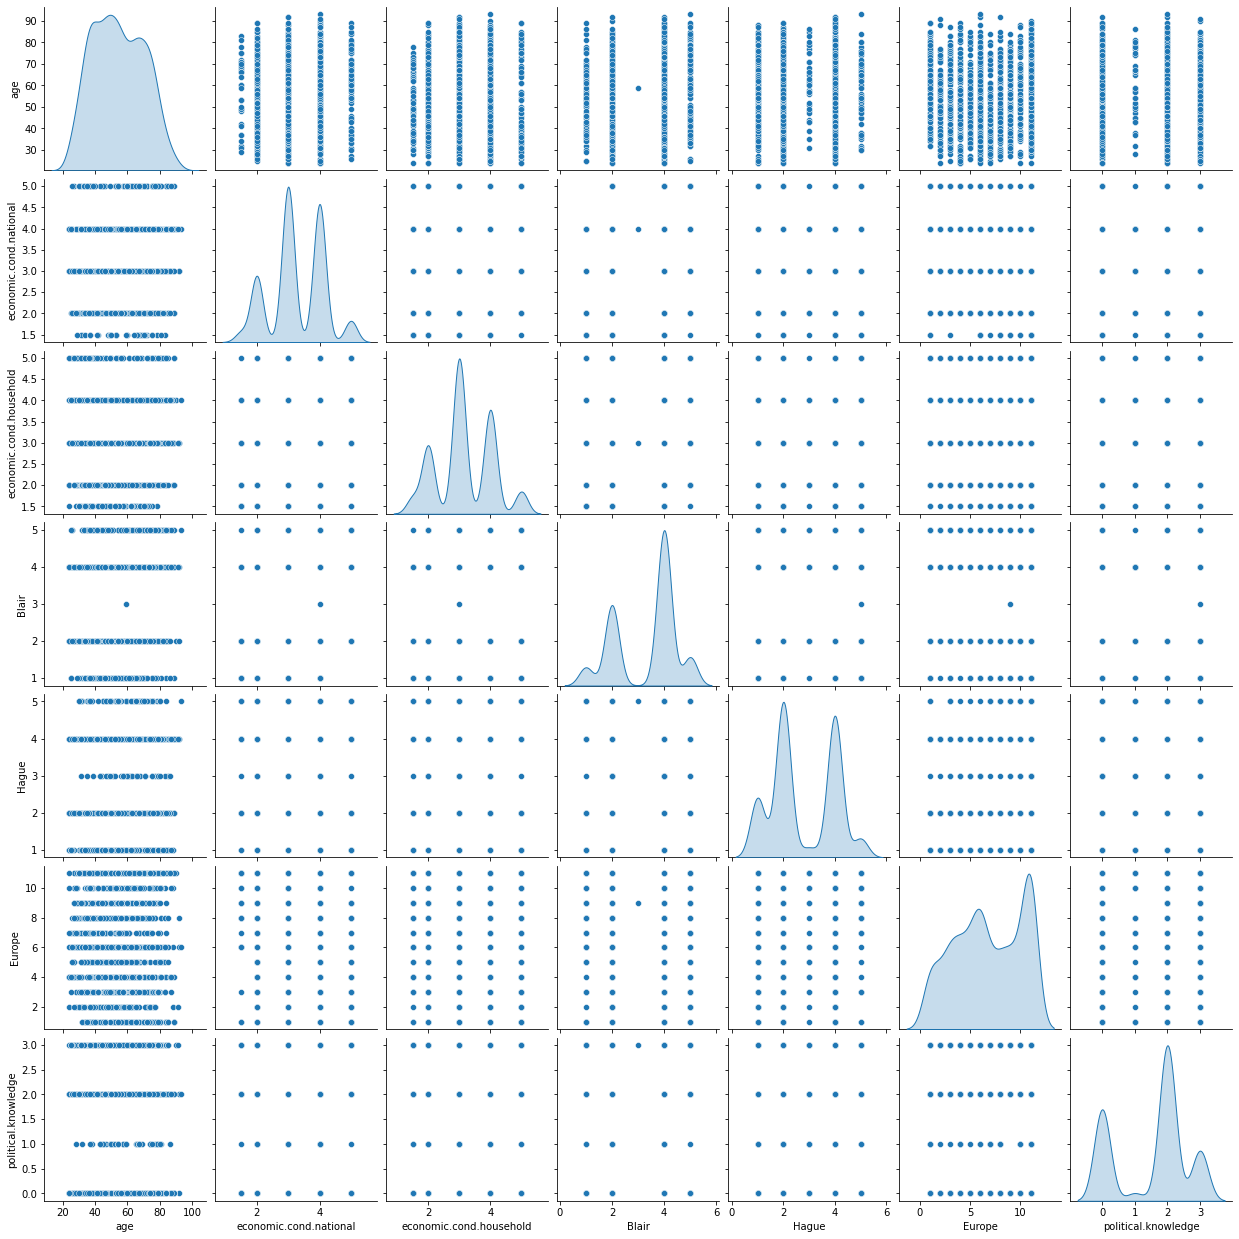

In [21]:
sns.pairplot(data,diag_kind = 'kde')

In [22]:
categorical_features

['vote', 'gender']

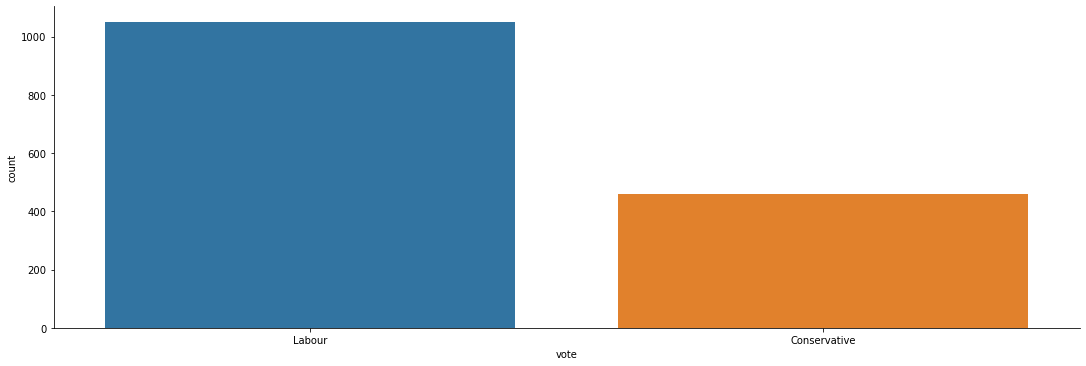

In [23]:
sns.catplot('vote',data = data,kind = 'count',aspect = 3)


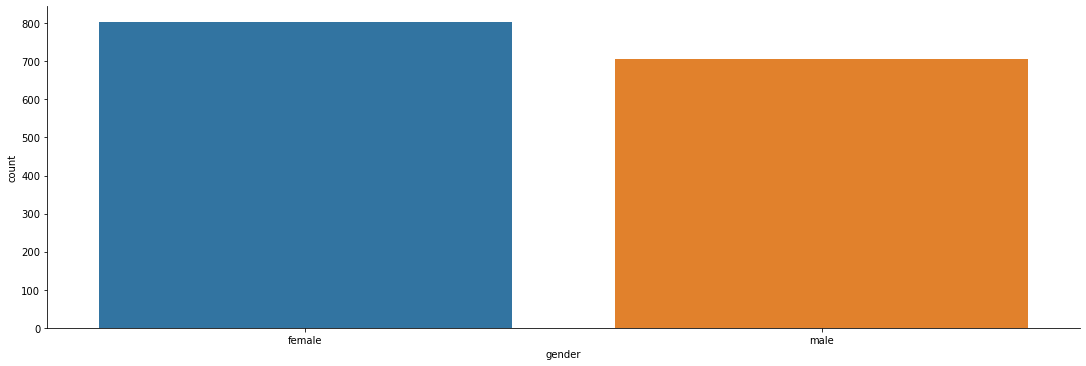

In [24]:
sns.catplot('gender',data = data,kind = 'count',aspect = 3)

In [25]:
for i in categorical_features:
    print('\n----------------------')
    print(data[i].value_counts())
    


----------------------
Labour          1051
Conservative     458
Name: vote, dtype: int64

----------------------
female    804
male      705
Name: gender, dtype: int64


In [26]:
data = pd.get_dummies(data,drop_first=True)

In [27]:
data.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote_Labour,gender_male
0,43.0,3.0,3.0,4.0,1.0,2.0,2.0,1,0
1,36.0,4.0,4.0,4.0,4.0,5.0,2.0,1,1
3,24.0,4.0,2.0,2.0,1.0,4.0,0.0,1,0
4,41.0,2.0,2.0,1.0,1.0,6.0,2.0,1,1
5,47.0,3.0,4.0,4.0,4.0,4.0,2.0,1,1


In [28]:
data.columns

Index(['age', 'economic.cond.national', 'economic.cond.household', 'Blair',
       'Hague', 'Europe', 'political.knowledge', 'vote_Labour', 'gender_male'],
      dtype='object')

In [29]:
x = data.drop(columns=['vote_Labour'])
y = data['vote_Labour']

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)


In [31]:
x_train.shape,x_test.shape

((1056, 8), (453, 8))

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Logistic Regression

In [33]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
model_score = model.score(x_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))

0.8300220750551877
[[ 97  43]
 [ 34 279]]


In [34]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.74      0.69      0.72       140
           1       0.87      0.89      0.88       313

    accuracy                           0.83       453
   macro avg       0.80      0.79      0.80       453
weighted avg       0.83      0.83      0.83       453



In [35]:
grid_search = model.fit(x_train,y_train)

AUC: 0.891


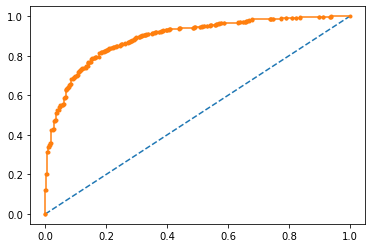

In [36]:
# predict probabilities
probs = grid_search.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# LDA

In [37]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clfLDA = LinearDiscriminantAnalysis()
clfLDA.fit(x_train, y_train)
y_pred=clfLDA.predict(x_test)
model_scoreLDA = clfLDA.score(x_test, y_test)

print(model_scoreLDA)
print(metrics.confusion_matrix(y_test, y_pred))


0.8278145695364238
[[ 98  42]
 [ 36 277]]


In [38]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.70      0.72       140
           1       0.87      0.88      0.88       313

    accuracy                           0.83       453
   macro avg       0.80      0.79      0.80       453
weighted avg       0.83      0.83      0.83       453



In [39]:
grid_search = clfLDA.fit(x_train,y_train)

AUC: 0.891


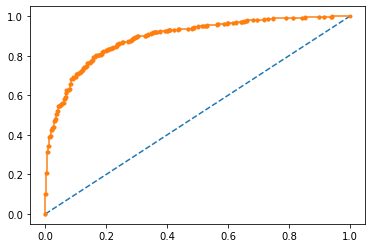

In [40]:
# predict probabilities
probs = grid_search.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# KNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train_scaled=ss.fit_transform(x_train) #scaling the data since KNN is a distance based algorithm.
x_test_scaled=ss.transform(x_test)
clfKNN=KNeighborsClassifier()
clfKNN.fit(x_train_scaled,y_train)
y_pred=clfKNN.predict(x_test_scaled)

model_scoreKNN = clfKNN.score(x_test_scaled, y_test)
print(model_scoreKNN)
print(metrics.confusion_matrix(y_test, y_pred))

0.8211920529801324
[[102  38]
 [ 43 270]]


In [42]:
grid_search = clfKNN.fit(x_train,y_train)

In [43]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.73      0.72       140
           1       0.88      0.86      0.87       313

    accuracy                           0.82       453
   macro avg       0.79      0.80      0.79       453
weighted avg       0.82      0.82      0.82       453



AUC: 0.925


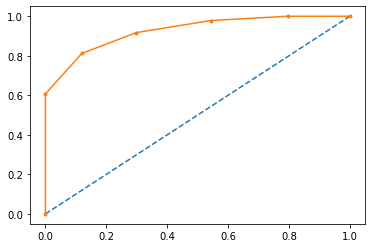

In [44]:
# predict probabilities
probs = grid_search.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# Naive Bayes

In [45]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [46]:
model = GaussianNB()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
model_score = model.score(x_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))

0.8344370860927153
[[103  37]
 [ 38 275]]


In [47]:
grid_search = clfKNN.fit(x_train,y_train)

In [48]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.73      0.72       140
           1       0.88      0.86      0.87       313

    accuracy                           0.82       453
   macro avg       0.79      0.80      0.79       453
weighted avg       0.82      0.82      0.82       453



AUC: 0.925


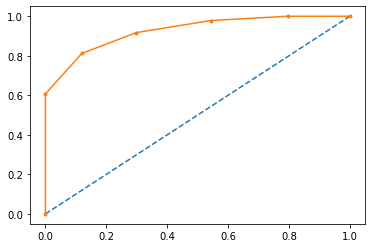

In [49]:
# predict probabilities
probs = grid_search.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# Random Forest model

In [50]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clfRF=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clfRF.fit(x_train,y_train)

y_pred=clfRF.predict(x_test)
model_scoreRF = clfRF.score(x_test, y_test)
print(model_scoreRF)
print(metrics.confusion_matrix(y_test, y_pred))

0.82560706401766
[[ 98  42]
 [ 37 276]]


In [51]:
grid_search = clfRF.fit(x_train,y_train)

In [52]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.70      0.71       140
           1       0.87      0.88      0.87       313

    accuracy                           0.83       453
   macro avg       0.80      0.79      0.79       453
weighted avg       0.82      0.83      0.82       453



AUC: 1.000


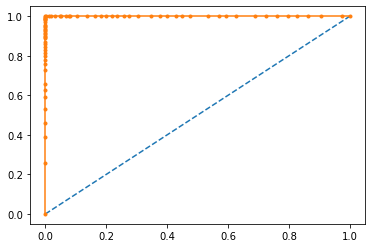

In [53]:
# predict probabilities
probs = grid_search.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# Bagging

In [54]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=50,random_state=1) #BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(x_train, y_train)
y_predict = bgcl.predict(x_test)
print(bgcl.score(x_test , y_test))
print(metrics.confusion_matrix(y_test, y_predict))

0.8013245033112583
[[102  38]
 [ 52 261]]


In [55]:
grid_search = bgcl.fit(x_train,y_train)

In [56]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.66      0.73      0.69       140
           1       0.87      0.83      0.85       313

    accuracy                           0.80       453
   macro avg       0.77      0.78      0.77       453
weighted avg       0.81      0.80      0.80       453



AUC: 1.000


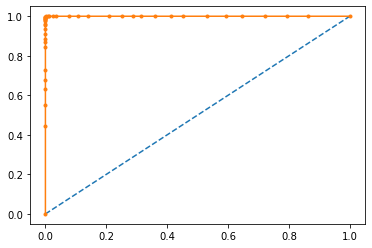

In [57]:
# predict probabilities
probs = grid_search.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# Boosting

In [58]:
from sklearn.ensemble import AdaBoostClassifier

clfADB = AdaBoostClassifier(n_estimators=100)
clfADB.fit(x_train,y_train)
y_pred=clfADB.predict(x_test)
model_scoreADB = clfADB.score(x_test, y_test)
print(model_scoreADB)
print(metrics.confusion_matrix(y_test, y_pred))

0.8057395143487859
[[ 94  46]
 [ 42 271]]


In [59]:
grid_search = clfADB.fit(x_train,y_train)

In [60]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.67      0.68       140
           1       0.85      0.87      0.86       313

    accuracy                           0.81       453
   macro avg       0.77      0.77      0.77       453
weighted avg       0.80      0.81      0.80       453



AUC: 0.917


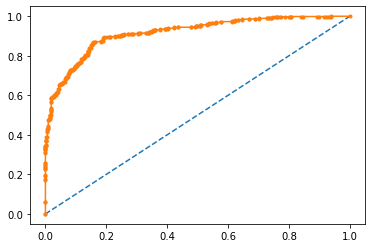

In [61]:
# predict probabilities
probs = grid_search.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# Gradient Boosting

In [62]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(x_train, y_train)
y_predict = gbcl.predict(x_test)
print(gbcl.score(x_test, y_test))
print(metrics.confusion_matrix(y_test, y_predict))

0.8322295805739515
[[ 97  43]
 [ 33 280]]


In [63]:
grid_search = clfADB.fit(x_train,y_train)

In [64]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.75      0.69      0.72       140
           1       0.87      0.89      0.88       313

    accuracy                           0.83       453
   macro avg       0.81      0.79      0.80       453
weighted avg       0.83      0.83      0.83       453



AUC: 0.917


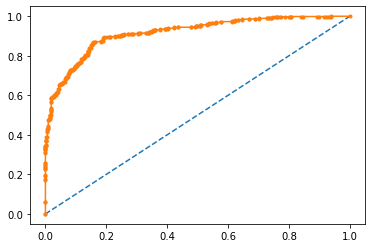

In [65]:
# predict probabilities
probs = grid_search.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()